In [1]:
from gensim.models import KeyedVectors
import json
from sklearn.manifold import TSNE
from numpy.linalg import norm
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [2]:
model = KeyedVectors.load_word2vec_format("data/word2vec-google-news-300.gz", binary=True)

In [3]:
model.most_similar('camera', topn=10)

[('cameras', 0.8131938576698303),
 ('Wagging_finger', 0.7311819791793823),
 ('camera_lens', 0.7250816226005554),
 ('camcorder', 0.7037475109100342),
 ('Camera', 0.6848660111427307),
 ('Canon_digital_SLR', 0.6474252343177795),
 ('Cameras', 0.6350969672203064),
 ('Nikon_D####_digital_SLR', 0.6259366273880005),
 ('tripod', 0.6189838647842407),
 ('EyeToy_USB', 0.6173486709594727)]

In [4]:
test_words= ["eating","punching","coding","enormous","book"]
X=[]
labels=[]

In [5]:
for w in tqdm(test_words):
    sorted_words= model.most_similar(w,topn=10)
    X.append(model[w])
    labels.append(w)
    for s in sorted_words:
        X.append(model[s[0]])
        labels.append(s[0])

  0%|          | 0/5 [00:00<?, ?it/s]

In [6]:
X = TSNE(n_components=2).fit_transform(X)

In [7]:
y = [i[1] for i in X]
x = [i[0] for i in X]

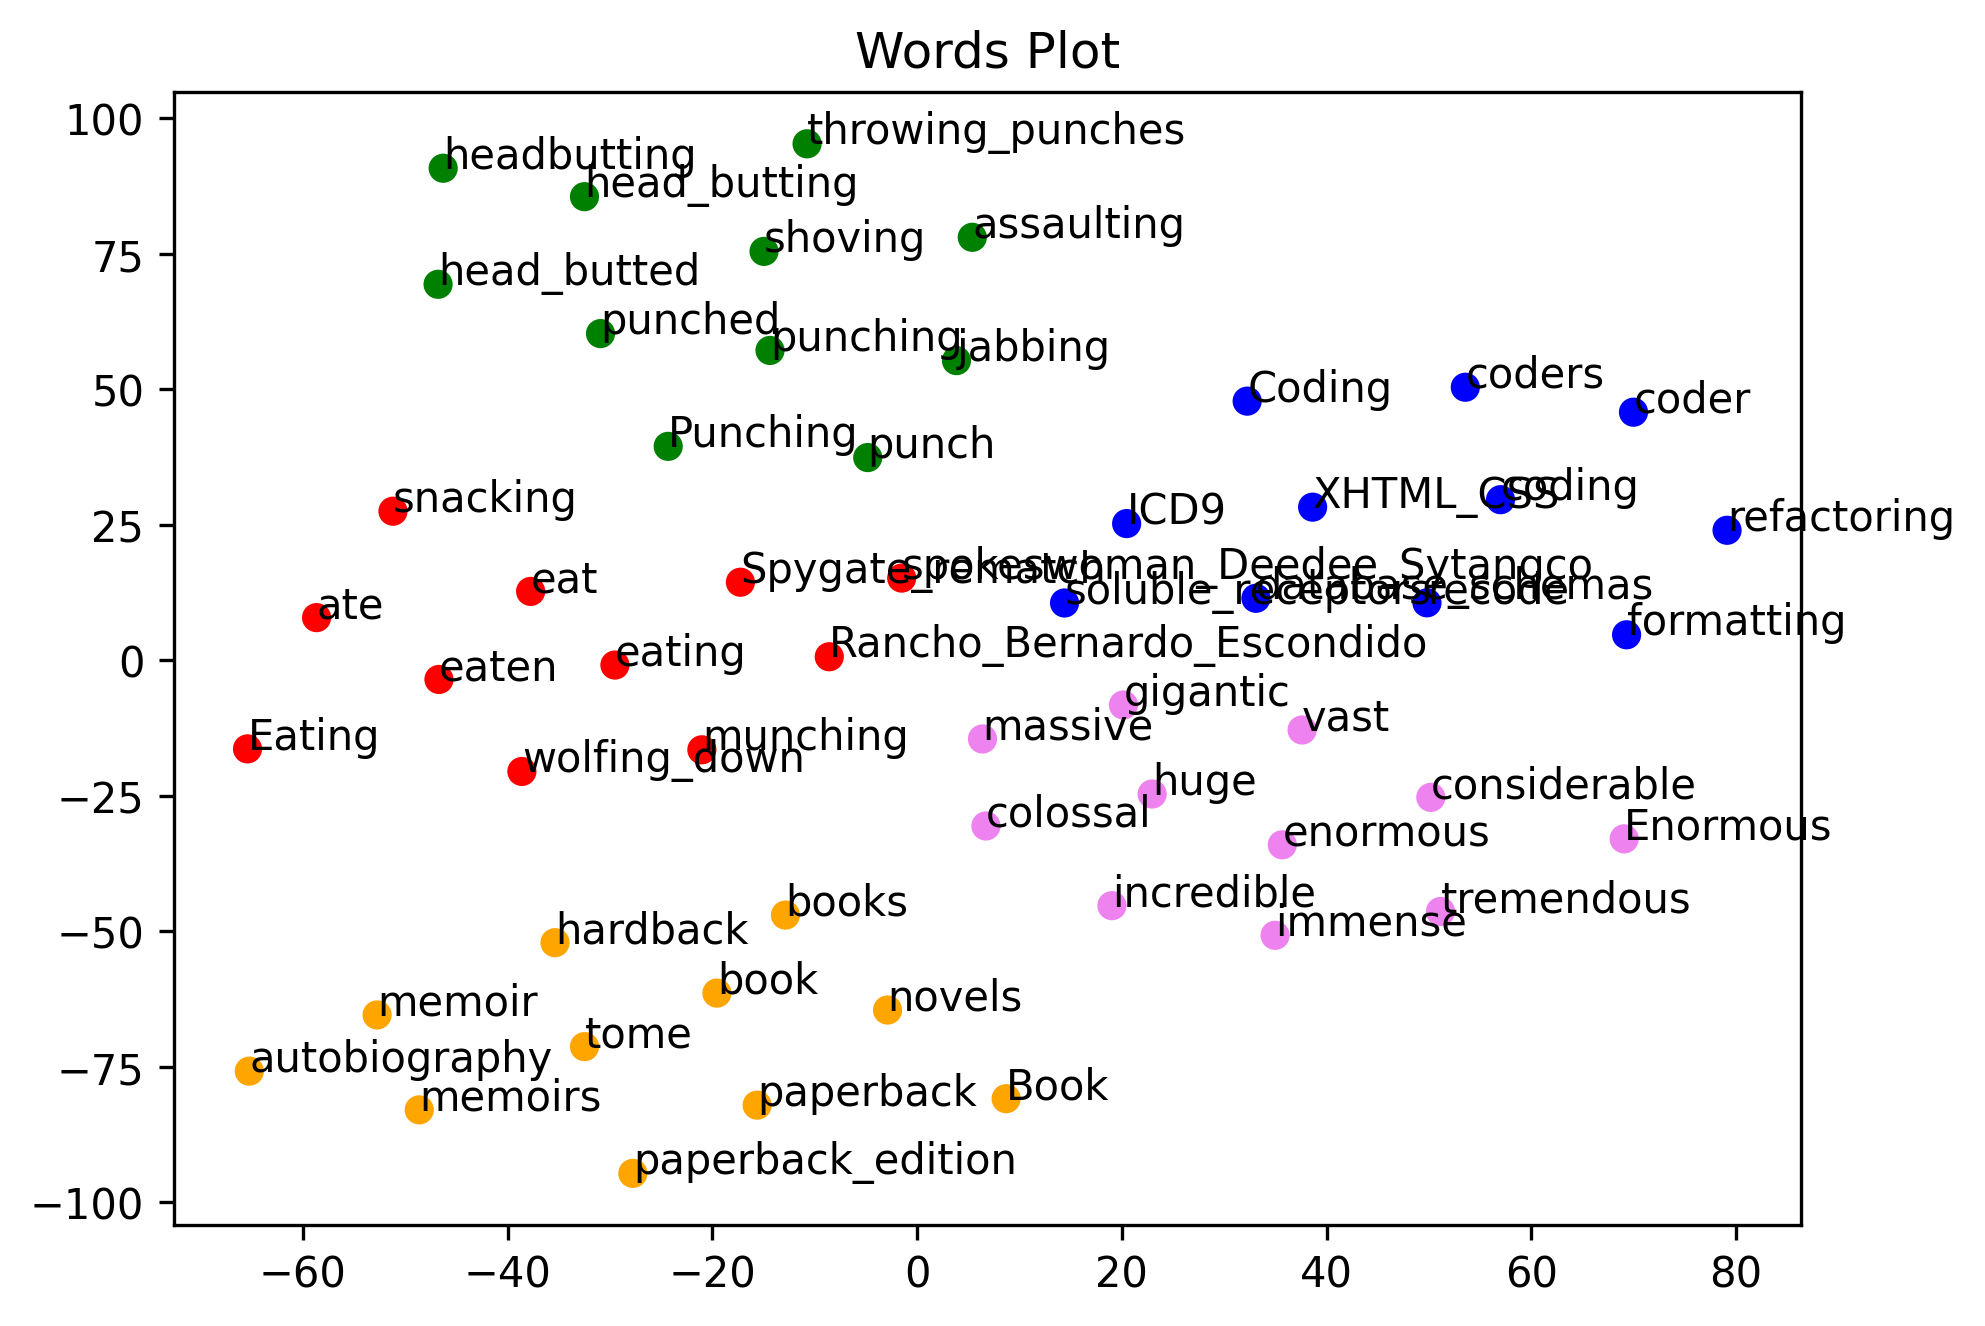

In [8]:
plt.figure(facecolor="white",figsize=(7,5),dpi=300)
color= ["red"]*11 +["green"]*11+ ["blue"]*11+ ["violet"]*11 + ["orange"]*11
plt.scatter(x,y,c=color)
for i,label in enumerate(labels):
    plt.annotate(label,(x[i],y[i]))
plt.title("Words Plot")
plt.savefig("./images/gensim.png",dpi=300)
plt.show()